Criando os nomes

In [1]:
import pandas as pd
import numpy as np

Import de dados do IBGE

In [2]:
nomes_m = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/?qtd=200&sexo=m')
nomes_f = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/?qtd=200&sexo=f')

In [3]:
nomes_m.head(3)

,nome,regiao,freq,rank,sexo
0,JOSE,0,5732508,1,M
1,JOAO,0,2971935,2,M
2,ANTONIO,0,2567494,3,M


In [4]:
nomes_f.head(3)


,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
1,ANA,0,3079729,2,F
2,FRANCISCA,0,721637,3,F


In [5]:
print("Quantidade de nomes: " + str(len(nomes_f) + len(nomes_m)))

Quantidade de nomes: 400


In [6]:
frames = [nomes_m, nomes_f]
nomes = pd.concat(frames).nome.to_frame()
nomes.sample(5) #pega dados aleatorios do df

,nome
147,LILIAN
166,KELLY
21,MATEUS
139,OSMAR
17,FELIPE


Incluindo IDs

In [7]:
np.random.seed(123)

In [8]:
nomes['id_aluno'] = np.random.permutation(len(nomes)) + 1
nomes

,nome,id_aluno
0,JOSE,235
1,JOAO,43
2,ANTONIO,304
3,FRANCISCO,156
4,CARLOS,343
...,...,...
195,ROSANE,231
196,IVONETE,99
197,LUCIANE,323
198,ISADORA,383


Dominios de email

In [9]:
total_alunos = len(nomes)
dominios = ['@dominiodoemail.com.br', '@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)
nomes

,nome,id_aluno,dominio
0,JOSE,235,@dominiodoemail.com.br
1,JOAO,43,@servicodoemail.com
2,ANTONIO,304,@servicodoemail.com
3,FRANCISCO,156,@servicodoemail.com
4,CARLOS,343,@servicodoemail.com
...,...,...,...
195,ROSANE,231,@dominiodoemail.com.br
196,IVONETE,99,@servicodoemail.com
197,LUCIANE,323,@dominiodoemail.com.br
198,ISADORA,383,@servicodoemail.com


Concatenando nome com o email

In [10]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()
nomes

,nome,id_aluno,dominio,email
0,JOSE,235,@dominiodoemail.com.br,jose@dominiodoemail.com.br
1,JOAO,43,@servicodoemail.com,joao@servicodoemail.com
2,ANTONIO,304,@servicodoemail.com,antonio@servicodoemail.com
3,FRANCISCO,156,@servicodoemail.com,francisco@servicodoemail.com
4,CARLOS,343,@servicodoemail.com,carlos@servicodoemail.com
...,...,...,...,...
195,ROSANE,231,@dominiodoemail.com.br,rosane@dominiodoemail.com.br
196,IVONETE,99,@servicodoemail.com,ivonete@servicodoemail.com
197,LUCIANE,323,@dominiodoemail.com.br,luciane@dominiodoemail.com.br
198,ISADORA,383,@servicodoemail.com,isadora@servicodoemail.com


Tabela de cursos

In [11]:
import html5lib

In [12]:
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [13]:
type(cursos)

list

In [14]:
cursos = cursos[0] #convert lista para DF
type(cursos)

pandas.core.frame.DataFrame

Alterando o index de cursos


In [15]:
cursos = cursos.rename(columns={'Nome do curso' : 'nome_do_curso'})
cursos

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


In [16]:
cursos['id'] = cursos.index + 1
cursos.head(5)

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


resetando index para usar o id como index

In [17]:
cursos = cursos.set_index('id')
cursos

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python
6,PHP com MySql
7,.NET para web
8,Novas integrações com Java
9,TDD com Java


Matriculando os alunos nos cursos

In [18]:
nomes['matriculas'] = np.ceil((np.random.exponential(size = total_alunos) * 1.5)).astype(int)
nomes.head(5)

,nome,id_aluno,dominio,email,matriculas
0,JOSE,235,@dominiodoemail.com.br,jose@dominiodoemail.com.br,3
1,JOAO,43,@servicodoemail.com,joao@servicodoemail.com,1
2,ANTONIO,304,@servicodoemail.com,antonio@servicodoemail.com,1
3,FRANCISCO,156,@servicodoemail.com,francisco@servicodoemail.com,3
4,CARLOS,343,@servicodoemail.com,carlos@servicodoemail.com,1


In [19]:
nomes.matriculas.describe()

count    400.000000
mean       2.137500
std        1.511392
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        9.000000
Name: matriculas, dtype: float64

Plotagem das matriculas

In [20]:
import seaborn as sns

C:\Users\barba\anaconda3\envs\data-analysis-school\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='matriculas', ylabel='Density'>

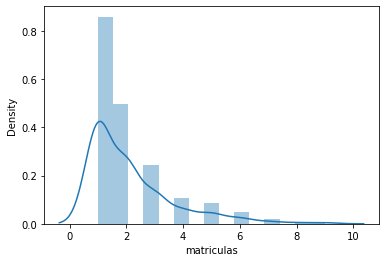

In [21]:
sns.distplot(nomes.matriculas, norm_hist=True)

In [22]:
nomes.matriculas.value_counts()

1    183
2    106
3     52
4     23
5     18
6     10
7      4
8      2
9      2
Name: matriculas, dtype: int64

Selecionar os cursos nos quais os alunos estão inscritos

In [23]:
qtd_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)


Atribuindo curso aleatoriamente

In [24]:
for index, row in nomes.iterrows():
    id = row.id_aluno
    matriculas = row.matriculas
    for i in range(matriculas):
        mat = [id, np.random.choice(cursos.index, p = prob)]
        qtd_matriculas.append(mat)
matriculas = pd.DataFrame(qtd_matriculas, columns=['id_aluno', 'id_curso'])
matriculas.head()

,id_aluno,id_curso
0,235,11
1,235,11
2,235,2
3,43,13
4,304,10


In [25]:
matriculas_cursos = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})
matriculas_cursos

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,8,Lógica de programação
2,81,Java para Web
3,18,C# para Web
4,17,Ruby on Rails
5,24,Cursos de Python
6,68,PHP com MySql
7,4,.NET para web
8,54,Novas integrações com Java
9,68,TDD com Java


Saída em diferentes formatos

In [26]:
matriculas_cursos.to_csv('matriculas_por_curso.csv', index=False)

In [27]:
matriculas_json = matriculas_cursos.to_json('matriculas_por_curso.json')

In [28]:
matriculas_html = matriculas_cursos.to_html('matriculas_por_curso.html')

Criando bando SQL

In [29]:
from sqlalchemy import create_engine, MetaData, Table

In [30]:
engine = create_engine('sqlite:///:memory:')
engine

Engine(sqlite:///:memory:)

In [31]:
type(engine)

sqlalchemy.engine.base.Engine

In [32]:
matriculas_cursos.to_sql('matriculas', engine)

In [33]:
print(engine.table_names())

['matriculas']


C:\Users\barba\anaconda3\envs\data-analysis-school\lib\site-packages\ipykernel_launcher.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  """Entry point for launching an IPython kernel.


Buscando no banco SQL

In [34]:
query = 'select * from matriculas where quantidade_de_alunos < 20'
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,1,8,Lógica de programação
1,3,18,C# para Web
2,4,17,Ruby on Rails
3,7,4,.NET para web
4,12,12,Hardware básico


In [35]:
muitas_matriculas = pd.read_sql('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])
muitas_matriculas

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,8
1,Java para Web,81
2,C# para Web,18
3,Ruby on Rails,17
4,Cursos de Python,24
5,PHP com MySql,68
6,.NET para web,4
7,Novas integrações com Java,54
8,TDD com Java,68
9,Código limpo com C#,48


In [36]:
muitas_matriculas = muitas_matriculas.query('quantidade_de_alunos > 60')
muitas_matriculas

,nome_do_curso,quantidade_de_alunos
1,Java para Web,81
5,PHP com MySql,68
8,TDD com Java,68
15,Estatística básica,71
17,Programação funcional,79


Escrevendo no banco SQL

In [37]:
muitas_matriculas.to_sql('muitas_matriculas', con=engine)
print(engine.table_names())

['matriculas', 'muitas_matriculas']


C:\Users\barba\anaconda3\envs\data-analysis-school\lib\site-packages\ipykernel_launcher.py:2: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  


Nomes da próxima turma

In [38]:
id_curso = 16
proxima_turma = matriculas.query('id_curso == {}'.format(id_curso))
proxima_turma

,id_aluno,id_curso
21,174,16
22,174,16
23,218,16
28,217,16
77,262,16
...,...,...
761,169,16
787,100,16
791,362,16
839,215,16


In [39]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
2,16,LAIS,@dominiodoemail.com.br,lais@dominiodoemail.com.br,6
5,16,JOSUE,@servicodoemail.com,josue@servicodoemail.com,1
6,16,ADAO,@servicodoemail.com,adao@servicodoemail.com,3
13,16,REINALDO,@servicodoemail.com,reinaldo@servicodoemail.com,4
19,16,BENEDITA,@dominiodoemail.com.br,benedita@dominiodoemail.com.br,1
...,...,...,...,...,...
358,16,LUCIANO,@servicodoemail.com,luciano@servicodoemail.com,3
362,16,REGIANE,@dominiodoemail.com.br,regiane@dominiodoemail.com.br,2
376,16,NAIR,@servicodoemail.com,nair@servicodoemail.com,1


In [40]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

id_aluno
2          LAIS
5         JOSUE
6          ADAO
13     REINALDO
19     BENEDITA
         ...   
358     LUCIANO
362     REGIANE
376        NAIR
384      RAQUEL
397     ALISSON
Name: nome, Length: 71, dtype: object

In [41]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

,nome
id_aluno,
2,LAIS
5,JOSUE
6,ADAO
13,REINALDO
19,BENEDITA
...,...
358,LUCIANO
362,REGIANE
376,NAIR


In [42]:
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    Estatística básica
Name: 16, dtype: object

In [43]:
nome_curso = nome_curso.nome_do_curso
nome_curso

'Estatística básica'

In [45]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()
proxima_turma = proxima_turma.rename(columns={'nome':'Alunos do curso de {}'.format(nome_curso)})
proxima_turma

,Alunos do curso de Estatística básica
id_aluno,
2,LAIS
5,JOSUE
6,ADAO
13,REINALDO
19,BENEDITA
...,...
358,LUCIANO
362,REGIANE
376,NAIR


Exportando para excel

In [47]:
proxima_turma.to_excel('proxima_turma.xlsx', index=False)